# YouTube Makeup Content Analysis - Phase 2

## Objective
This analysis examines 3,967 YouTube makeup videos to identify patterns and trends that influence viewer engagement. The study focuses on understanding the relationship between content characteristics (velocity, duration, timing) and engagement metrics.

## Dataset
- Source: YouTube Data API v3
- Size: 3,967 videos
- Time Period: November 2024 - November 2025
- Categories: Makeup, Hair, Skincare, and related beauty content

## Methodology
1. Data cleaning and preparation
2. Feature engineering (velocity metrics, temporal features, content categorization)
3. Correlation analysis across engagement metrics
4. Comparative analysis by content velocity and duration
5. Temporal pattern identification
6. Content strategy analysis through text mining

---

# 1. Data Preparation and Initial Exploration


**Step 1.1: Load Dataset**

Import required libraries and load the YouTube video metadata from CSV file.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/makeup_youtube_merged_3967.csv")
df.head(5)

,video_id,query_used,title,channel_id,channel_title,audio_language,published_at,view_count,like_count,comment_count,duration,duration_seconds,duration_minutes,description,tags,favorite_count,video_url,channel_country
0,IU8itp78taU,luxury makeup,Colorpop Holiday Set #shorts #fyp #shortvideo...,UCVRqF4H7agcJ3c5l949vZ7Q,Tarannum A Khan,en,2024-11-11T15:14:27Z,1336,59,0,PT16S,16.0,0.27,NaN,NaN,NaN,NaN,NaN
1,tnkmqUVBqfI,luxury makeup,Bought my wishlist product after a long wait N...,UCCa_wgdD931fdQJxrnhxWDA,Be Sassy,en-IN,2024-11-14T12:42:44Z,1274,40,19,PT41S,41.0,0.68,NaN,NaN,NaN,NaN,NaN
2,wLo5tks8g80,luxury makeup,No foundation Beginner Luxury Makeup for dark ...,UCetkBNSYkq2lrN2LhiZpgXg,Just Call Me Olu,en-US,2024-11-11T13:00:15Z,352,17,7,PT9M50S,590.0,9.83,NaN,NaN,NaN,NaN,NaN
3,27qV-8RXwWo,luxury makeup,Perfect red lipstick for holidays! #redlipstic...,UCXJZ7K1JalR81q0KUd3v2Eg,INNER GLOW,en,2024-11-12T19:42:04Z,687,13,0,PT15S,15.0,0.25,NaN,NaN,NaN,NaN,NaN
4,aImfIUtMPak,luxury makeup,Luxury makeup dupe alert 🚨,UC5KFgxy8tWC7LDIZv3yriEg,Maria - No Spring Chicken,en-GB,2024-11-14T15:05:15Z,484,19,0,PT57S,57.0,0.95,NaN,NaN,NaN,NaN,NaN


**Step 1.2: Descriptive Statistics**

Generate summary statistics for all numeric variables to understand central tendencies and distributions.

In [2]:
df.describe()

,view_count,like_count,comment_count,duration_seconds,duration_minutes,favorite_count
count,3.967000e+03,3.967000e+03,3967.000000,2122.000000,2122.000000,1845.0
mean,9.126042e+05,1.764449e+04,165.350643,759.833176,12.663893,0.0
std,5.092033e+06,9.973548e+04,1016.462201,1956.336746,32.605589,0.0
min,0.000000e+00,0.000000e+00,0.000000,2.000000,0.030000,0.0
25%,5.245000e+02,9.000000e+00,0.000000,34.000000,0.570000,0.0
50%,3.178000e+03,5.800000e+01,5.000000,255.500000,4.260000,0.0
75%,3.689000e+04,9.735000e+02,42.500000,936.500000,15.610000,0.0
max,9.994173e+07,2.055684e+06,29325.000000,42901.000000,715.020000,0.0


**Step 1.3: Missing Value Analysis**

Identify missing values across all columns to determine data quality and required cleaning steps.

In [3]:

print(df.isnull().sum())

video_id               0
query_used          1845
title                  0
channel_id             0
channel_title          0
audio_language      1845
published_at           0
view_count             0
like_count             0
comment_count          0
duration               0
duration_seconds    1845
duration_minutes    1845
description         2820
tags                3196
favorite_count      2122
video_url           2122
channel_country     2967
dtype: int64


**Step 1.4: Remove Redundant Columns**

Drop video_url column as it does not contribute to the analysis.

In [4]:
df.drop(columns=["video_url"])

,video_id,query_used,title,channel_id,channel_title,audio_language,published_at,view_count,like_count,comment_count,duration,duration_seconds,duration_minutes,description,tags,favorite_count,channel_country
0,IU8itp78taU,luxury makeup,Colorpop Holiday Set #shorts #fyp #shortvideo...,UCVRqF4H7agcJ3c5l949vZ7Q,Tarannum A Khan,en,2024-11-11T15:14:27Z,1336,59,0,PT16S,16.0,0.27,NaN,NaN,NaN,NaN
1,tnkmqUVBqfI,luxury makeup,Bought my wishlist product after a long wait N...,UCCa_wgdD931fdQJxrnhxWDA,Be Sassy,en-IN,2024-11-14T12:42:44Z,1274,40,19,PT41S,41.0,0.68,NaN,NaN,NaN,NaN
2,wLo5tks8g80,luxury makeup,No foundation Beginner Luxury Makeup for dark ...,UCetkBNSYkq2lrN2LhiZpgXg,Just Call Me Olu,en-US,2024-11-11T13:00:15Z,352,17,7,PT9M50S,590.0,9.83,NaN,NaN,NaN,NaN
3,27qV-8RXwWo,luxury makeup,Perfect red lipstick for holidays! #redlipstic...,UCXJZ7K1JalR81q0KUd3v2Eg,INNER GLOW,en,2024-11-12T19:42:04Z,687,13,0,PT15S,15.0,0.25,NaN,NaN,NaN,NaN
4,aImfIUtMPak,luxury makeup,Luxury makeup dupe alert 🚨,UC5KFgxy8tWC7LDIZv3yriEg,Maria - No Spring Chicken,en-GB,2024-11-14T15:05:15Z,484,19,0,PT57S,57.0,0.95,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,onjkMxoiwAE,NaN,Extreme Minimalist Makeup Declutter: What I Ac...,UCbStWxmYHI6Ap6AbpYrgz1Q,shesfrench,NaN,2025-04-25T16:01:10Z,5561,186,48,2157,NaN,NaN,Extreme Minimalist Makeup Declutter: What I Ac...,"french lifestyle, minimalist lifestyle, curate...",0.0,FR
3963,MjyKWJw-LEI,NaN,TRYING NEW MAKEUP - Sephora Haul and More!,UCIB0qtyTO6ULzAarlWB1LKg,Michele Wang,NaN,2025-04-20T14:00:35Z,32459,1640,149,2086,NaN,NaN,Thank you so much for tuning into today’s vide...,"michelle wang, luxury beauty, luxury makeup, l...",0.0,US
3964,jCDH-DdxtsM,NaN,"NEW NEW NEW: PR, DRUGSTORE & HIGH-END MAKEUP!",UCuLYq95sF0LGnfKLRSlVKkA,Nichole Fischer,NaN,2025-04-19T13:26:07Z,507,0,10,1694,NaN,NaN,CLICK HERE: https://www.instagram.com/nicholef...,"boxycharm, makeup, drugstore, tiny house",0.0,US
3965,D__xHdcIKBs,NaN,FULL FACE DOLLAR TREE + TRY ON HAUL // MASSIVE...,UCaGDX3EqA_rup3wnG0nvu4Q,Steph_BlogsMakeup,NaN,2025-04-17T21:03:49Z,582,0,12,1791,NaN,NaN,FULL FACE DOLLAR TREE + TRY ON HAUL // MASSIVE...,"Dollar tree, Dollar tree haul, Dollar tree mak...",0.0,US


**Step 1.5: Handle Missing Favorite Counts**

Fill missing favorite_count values with 0, consistent with YouTube API behavior.

In [5]:
df["favorite_count"]=df["favorite_count"].fillna(0)

**Step 1.3: Missing Value Analysis**

Identify missing values across all columns to determine data quality and required cleaning steps.

In [6]:
print(df.isnull().sum())

video_id               0
query_used          1845
title                  0
channel_id             0
channel_title          0
audio_language      1845
published_at           0
view_count             0
like_count             0
comment_count          0
duration               0
duration_seconds    1845
duration_minutes    1845
description         2820
tags                3196
favorite_count         0
video_url           2122
channel_country     2967
dtype: int64


**Step 1.6: Impute Missing Numeric Values**

Fill remaining missing numeric values with 0 to ensure complete dataset for calculations.

In [7]:
# List of columns to fill with 0 (Numeric Counts/Calculations)
numeric_cols = [
    'view_count', 'like_count', 'comment_count',
    'duration_seconds', 'duration_minutes', 'favorite_count'
]

# List of columns to fill with "UNKNOWN" (Text/Categorical)
text_cols = [
    'query_used', 'audio_language', 'description',
    'tags', 'video_url', 'channel_country'
]

# 1. Fill Numeric Columns with 0
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# 2. Fill Text/Categorical Columns with "UNKNOWN"
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna("UNKNOWN")


**Step 1.3: Missing Value Analysis**

Identify missing values across all columns to determine data quality and required cleaning steps.

In [8]:
print(df.isnull().sum())

video_id            0
query_used          0
title               0
channel_id          0
channel_title       0
audio_language      0
published_at        0
view_count          0
like_count          0
comment_count       0
duration            0
duration_seconds    0
duration_minutes    0
description         0
tags                0
favorite_count      0
video_url           0
channel_country     0
dtype: int64


**Step 1.7: Handle Zero View Counts**

Replace zero view counts with 1 to prevent division by zero errors in subsequent ratio calculations.

In [9]:

df['view_count'] = df['view_count'].replace(0, 1)

df['like_to_view_ratio'] = df['like_count'] / df['view_count']

df['comment_to_view_ratio'] = df['comment_count'] / df['view_count']

df['engagement_index'] = (df['like_count'] + df['comment_count']) / df['view_count']

**Step 1.8: Temporal Feature Engineering**

Parse publication timestamps and extract temporal features including day of week, hour, and video age in hours.

In [10]:
import pandas as pd
from datetime import datetime

df['published_at'] = pd.to_datetime(df['published_at'])

current_time = datetime.now(df['published_at'].dt.tz)

df['video_age_hours'] = (current_time - df['published_at']).dt.total_seconds() / (60 * 60) #video_age_hours is hours since the video posted

df['video_age_hours'] = df['video_age_hours'].replace(0, 0.1)

df['hourly_view_velocity'] = df['view_count'] / df['video_age_hours']

In [11]:
import numpy as np
import pandas as pd # Ensure pandas is imported if you're running this as a standalone snippet

# --- Keyword Lists (Using your provided lists) ---
makeup_keywords = [
    'makeup', 'cosmetics', 'beauty','swatches', 'full face', 'foundation', 'concealer',
    'primer', 'blush', 'bronzer', 'highlighter', 'contour', 'setting spray', 'powder',
    'bb cream', 'cc cream', 'baking', 'eyeshadow', 'mascara', 'eyeliner', 'brows',
    'eyebrows', 'lashes', 'falsies', 'liner', 'palette', 'smokey eye', 'cut crease',
    'lipstick', 'lip gloss', 'lip stain', 'lip balm', 'lipliner', 'lip kit']
hair_keywords = [
    'hair', 'shampoo', 'conditioner', 'style', 'styling', 'blowout', 'cut', 'trim',
    'wash day', 'routine', 'products', 'salon', 'curl', 'straighten', 'braid', 'wavy',
    'coily', 'heatless', 'flat iron', 'curling iron', 'diffuser', 'extensions', 'wig',
    'weave', 'dye', 'color', 'bleach',
    'highlights', 'balayage']
skincare_keywords = [
    'skincare', 'routine', 'spf', 'sunscreen', 'glow', 'anti-aging', 'dermatologist',
    'acne', 'breakout', 'sensitive skin', 'oily skin', 'dry skin', 'serum', 'cream',
    'mask', 'moisturizer', 'cleanser', 'toner', 'acid', 'retinol', 'vitamin c',
    'exfoliate', 'peel', 'eye cream', 'micellar', 'hydrogel', 'pimple patch']

# 2. Function to Assign Category (MODIFIED for Multiple Categories)
def assign_category_multi(row):
    # Initialize a list to hold all matching categories
    categories = []

    # Combine title, tags, and description for comprehensive matching.
    text_to_check = str(row['title']).lower() + " " + \
                    str(row['tags']).lower() + " " + \
                    str(row['description']).lower()

    # --- Check all categories independently ---
    # Hair
    if any(keyword in text_to_check for keyword in hair_keywords):
        categories.append('Hair')

    # Skincare
    if any(keyword in text_to_check for keyword in skincare_keywords):
        categories.append('Skincare')

    # Makeup
    if any(keyword in text_to_check for keyword in makeup_keywords):
        categories.append('Makeup')

    # --- Final Output ---
    if categories:
        # Join the list of categories with a comma and space
        return ", ".join(categories)
    else:
        # If the list is empty, return UNKNOWN
        return 'UNKNOWN'

# 3. Apply the Function to Create the 'category' Column
# Apply the function row-wise (axis=1)
df['category'] = df.apply(assign_category_multi, axis=1)

**Step 1.10: Verify Data Preparation**

Display sample rows to confirm all transformations have been applied correctly.

In [12]:
df.head(10)

,video_id,query_used,title,channel_id,channel_title,audio_language,published_at,view_count,like_count,comment_count,...,tags,favorite_count,video_url,channel_country,like_to_view_ratio,comment_to_view_ratio,engagement_index,video_age_hours,hourly_view_velocity,category
0,IU8itp78taU,luxury makeup,Colorpop Holiday Set #shorts #fyp #shortvideo...,UCVRqF4H7agcJ3c5l949vZ7Q,Tarannum A Khan,en,2024-11-11 15:14:27+00:00,1336,59,0,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.044162,0.000000,0.044162,9168.588024,0.145715,Hair
1,tnkmqUVBqfI,luxury makeup,Bought my wishlist product after a long wait N...,UCCa_wgdD931fdQJxrnhxWDA,Be Sassy,en-IN,2024-11-14 12:42:44+00:00,1274,40,19,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.031397,0.014914,0.046311,9099.116635,0.140014,Makeup
2,wLo5tks8g80,luxury makeup,No foundation Beginner Luxury Makeup for dark ...,UCetkBNSYkq2lrN2LhiZpgXg,Just Call Me Olu,en-US,2024-11-11 13:00:15+00:00,352,17,7,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.048295,0.019886,0.068182,9170.824691,0.038383,"Hair, Makeup"
3,27qV-8RXwWo,luxury makeup,Perfect red lipstick for holidays! #redlipstic...,UCXJZ7K1JalR81q0KUd3v2Eg,INNER GLOW,en,2024-11-12 19:42:04+00:00,687,13,0,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.018923,0.000000,0.018923,9140.127746,0.075163,Makeup
4,aImfIUtMPak,luxury makeup,Luxury makeup dupe alert 🚨,UC5KFgxy8tWC7LDIZv3yriEg,Maria - No Spring Chicken,en-GB,2024-11-14 15:05:15+00:00,484,19,0,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.039256,0.000000,0.039256,9096.741357,0.053206,Makeup
5,uuugY3oyfcU,luxury makeup,"""Exclusive Makeup Sale! Luxury, Long-Lasting M...",UCGTOZHn8qYhURD-j9-5SrJQ,La Beauté D’Alia,en,2024-11-14 17:17:42+00:00,50,0,0,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.000000,0.000000,0.000000,9094.533857,0.005498,Makeup
6,lwlGWaj4eyw,luxury makeup,Sephora gives makeup for FREE 😱#beautyhacks,UCnuM_Ne3qc60Bs0a3faNb8g,KIKKKAPRO,en,2024-11-11 05:12:21+00:00,4230016,169115,630,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.039980,0.000149,0.040129,9178.623024,460.855184,Makeup
7,a1I2Fs4F5lM,luxury makeup,Kay beauty vs Swiss beauty ✅ which one afforda...,UCsBrpHOT5pt8tlZpeZ1DROQ,Divya & beauty,en,2024-11-14 04:21:49+00:00,557624,5364,139,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.009619,0.000249,0.009869,9107.465246,61.227135,Makeup
8,AdTAlbFNJLc,luxury makeup,Experience luxury makeup right at home with Do...,UCcHxGPEGIYXJaBD_BzDHXbA,Y V O N,en,2024-11-13 19:45:59+00:00,580,11,0,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.018966,0.000000,0.018966,9116.062469,0.063624,"Hair, Makeup"
9,Y5wKNHmKeHA,luxury makeup,#chanel #chanelmakeup #luxury #luxurymakeup #m...,UCheW1Pf-Sq86fXea3m-jDEA,Shreya Yadav,en,2024-11-11 17:43:56+00:00,32,0,0,...,UNKNOWN,0.0,UNKNOWN,UNKNOWN,0.000000,0.000000,0.000000,9166.096635,0.003491,Makeup


**Step 1.11: Final Data Cleaning**

Save the processed dataset and remove videos with UNKNOWN category (23 observations) to ensure clean analysis.

In [13]:
df = df.drop(columns=['favorite_count'])
df.to_csv('final_trends_analysis.csv', index=False)

In [14]:
df = df[df['category'] != 'UNKNOWN']
#remove 23 observations with unknown categories

In [15]:
df = df[df['category'] != 'UNKNOWN']
#remove 23 observations with unknown categories

# 1. Work on a safe copy and create category_list
df_exploded_safe = df.copy()
df_exploded_safe['category_list'] = df_exploded_safe['category'].str.split(', ')

# 2. Explode so each row has a single category
df_exploded_safe = df_exploded_safe.explode('category_list')

# Group the exploded data by the single category
category_trends = df_exploded_safe.groupby('category_list').agg(
    total_videos=('video_id', 'nunique'),
    avg_hourly_velocity=('hourly_view_velocity', 'mean'),
    avg_engagement_index=('engagement_index', 'mean')
).reset_index()

# Sort to find the Hottest Trends (e.g., by Velocity)
top_trends = category_trends.sort_values(
    by='avg_hourly_velocity',
    ascending=False
).head(5)

print("\n--- Top Categories by HOURLY VELOCITY ---")
print(top_trends)




--- Top Categories by HOURLY VELOCITY ---
  category_list  total_videos  avg_hourly_velocity  avg_engagement_index
1        Makeup          3612           146.605473              0.047143
0          Hair           994           123.815372              0.049613
2      Skincare           803            81.283077              0.048090


**Step 1.12: Tag Expansion**

Explode comma-separated tags into individual rows to enable tag-level analysis while preserving video-level metrics.

In [16]:

df_exploded_safe.head(10)

,video_id,query_used,title,channel_id,channel_title,audio_language,published_at,view_count,like_count,comment_count,...,tags,video_url,channel_country,like_to_view_ratio,comment_to_view_ratio,engagement_index,video_age_hours,hourly_view_velocity,category,category_list
0,IU8itp78taU,luxury makeup,Colorpop Holiday Set #shorts #fyp #shortvideo...,UCVRqF4H7agcJ3c5l949vZ7Q,Tarannum A Khan,en,2024-11-11 15:14:27+00:00,1336,59,0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.044162,0.000000,0.044162,9168.588024,0.145715,Hair,Hair
1,tnkmqUVBqfI,luxury makeup,Bought my wishlist product after a long wait N...,UCCa_wgdD931fdQJxrnhxWDA,Be Sassy,en-IN,2024-11-14 12:42:44+00:00,1274,40,19,...,UNKNOWN,UNKNOWN,UNKNOWN,0.031397,0.014914,0.046311,9099.116635,0.140014,Makeup,Makeup
2,wLo5tks8g80,luxury makeup,No foundation Beginner Luxury Makeup for dark ...,UCetkBNSYkq2lrN2LhiZpgXg,Just Call Me Olu,en-US,2024-11-11 13:00:15+00:00,352,17,7,...,UNKNOWN,UNKNOWN,UNKNOWN,0.048295,0.019886,0.068182,9170.824691,0.038383,"Hair, Makeup",Hair
2,wLo5tks8g80,luxury makeup,No foundation Beginner Luxury Makeup for dark ...,UCetkBNSYkq2lrN2LhiZpgXg,Just Call Me Olu,en-US,2024-11-11 13:00:15+00:00,352,17,7,...,UNKNOWN,UNKNOWN,UNKNOWN,0.048295,0.019886,0.068182,9170.824691,0.038383,"Hair, Makeup",Makeup
3,27qV-8RXwWo,luxury makeup,Perfect red lipstick for holidays! #redlipstic...,UCXJZ7K1JalR81q0KUd3v2Eg,INNER GLOW,en,2024-11-12 19:42:04+00:00,687,13,0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.018923,0.000000,0.018923,9140.127746,0.075163,Makeup,Makeup
4,aImfIUtMPak,luxury makeup,Luxury makeup dupe alert 🚨,UC5KFgxy8tWC7LDIZv3yriEg,Maria - No Spring Chicken,en-GB,2024-11-14 15:05:15+00:00,484,19,0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.039256,0.000000,0.039256,9096.741357,0.053206,Makeup,Makeup
5,uuugY3oyfcU,luxury makeup,"""Exclusive Makeup Sale! Luxury, Long-Lasting M...",UCGTOZHn8qYhURD-j9-5SrJQ,La Beauté D’Alia,en,2024-11-14 17:17:42+00:00,50,0,0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.000000,0.000000,0.000000,9094.533857,0.005498,Makeup,Makeup
6,lwlGWaj4eyw,luxury makeup,Sephora gives makeup for FREE 😱#beautyhacks,UCnuM_Ne3qc60Bs0a3faNb8g,KIKKKAPRO,en,2024-11-11 05:12:21+00:00,4230016,169115,630,...,UNKNOWN,UNKNOWN,UNKNOWN,0.039980,0.000149,0.040129,9178.623024,460.855184,Makeup,Makeup
7,a1I2Fs4F5lM,luxury makeup,Kay beauty vs Swiss beauty ✅ which one afforda...,UCsBrpHOT5pt8tlZpeZ1DROQ,Divya & beauty,en,2024-11-14 04:21:49+00:00,557624,5364,139,...,UNKNOWN,UNKNOWN,UNKNOWN,0.009619,0.000249,0.009869,9107.465246,61.227135,Makeup,Makeup
8,AdTAlbFNJLc,luxury makeup,Experience luxury makeup right at home with Do...,UCcHxGPEGIYXJaBD_BzDHXbA,Y V O N,en,2024-11-13 19:45:59+00:00,580,11,0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.018966,0.000000,0.018966,9116.062469,0.063624,"Hair, Makeup",Hair


**Step 2.1: Overall Correlation Analysis**

Generate correlation heatmap for all videos to identify relationships between engagement metrics.

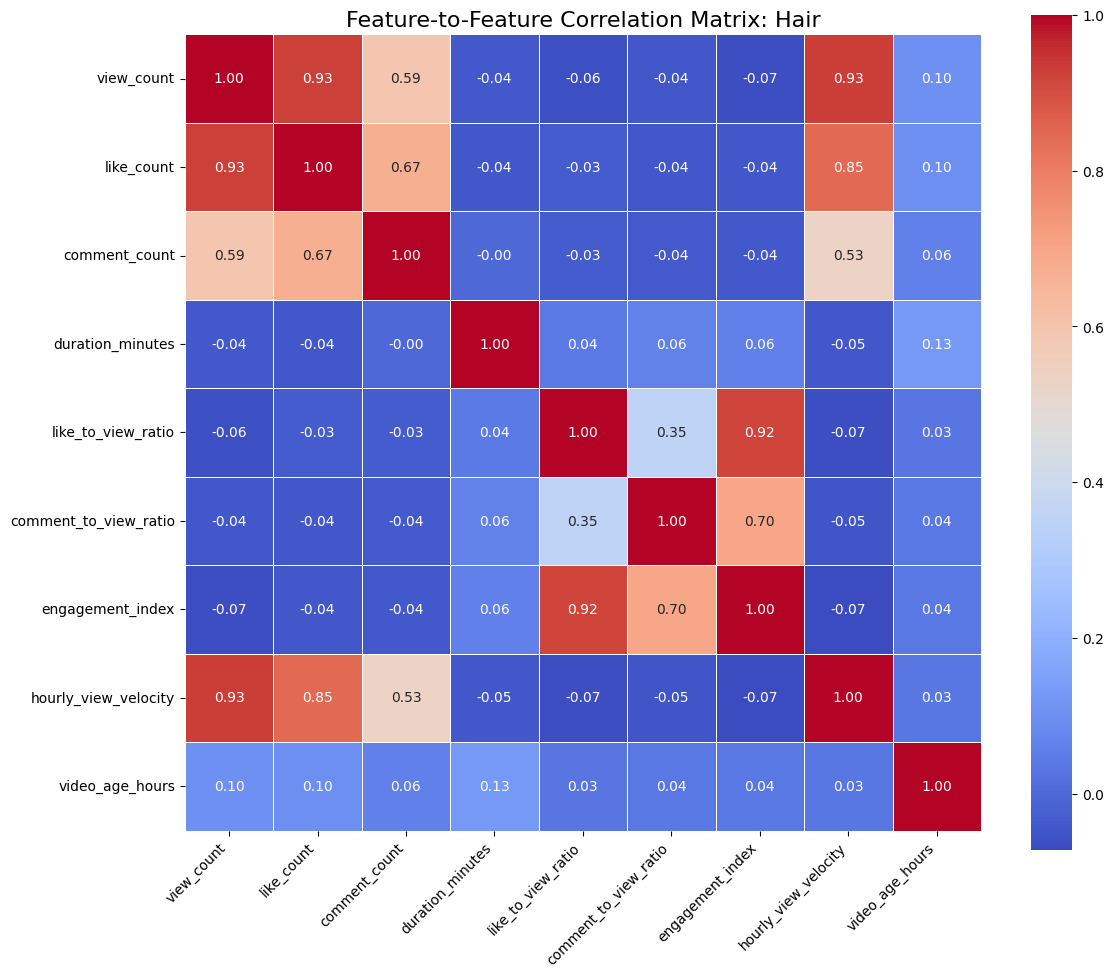

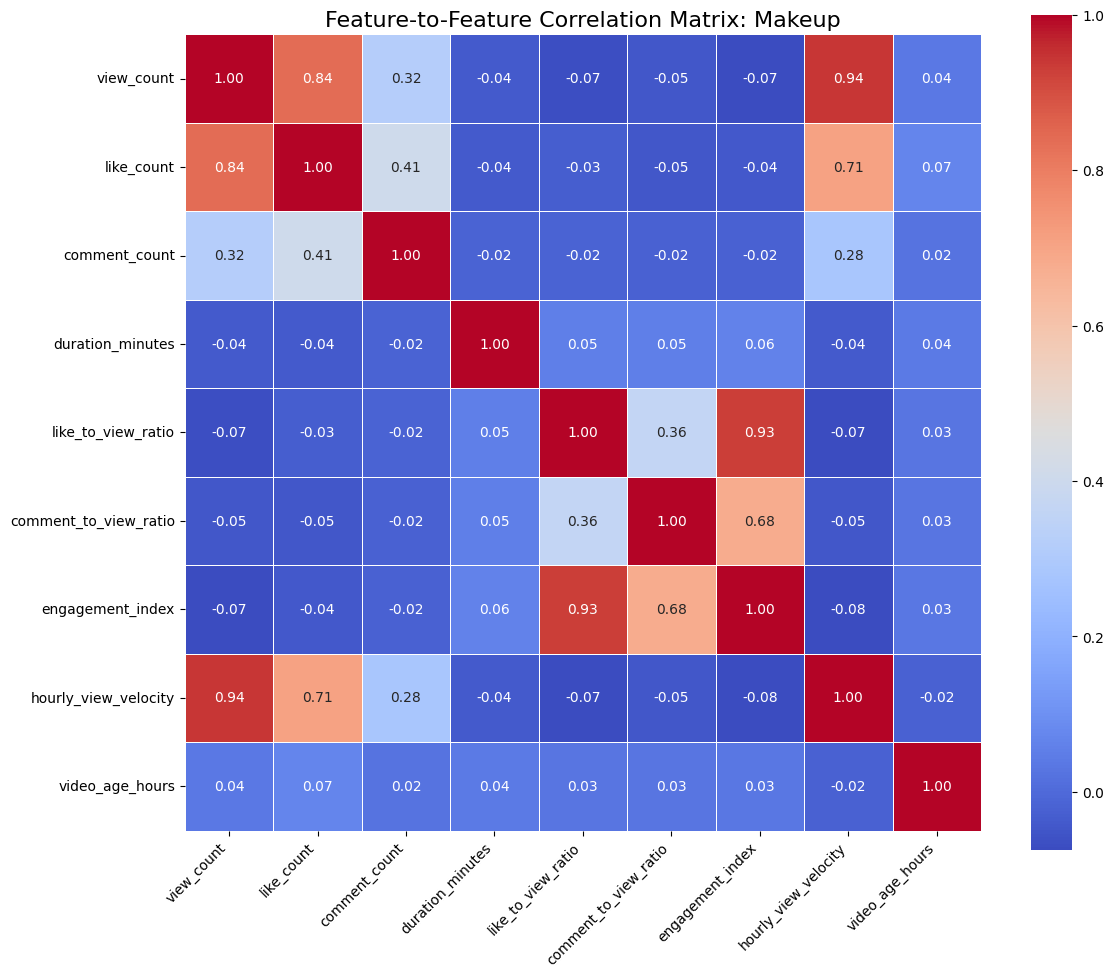

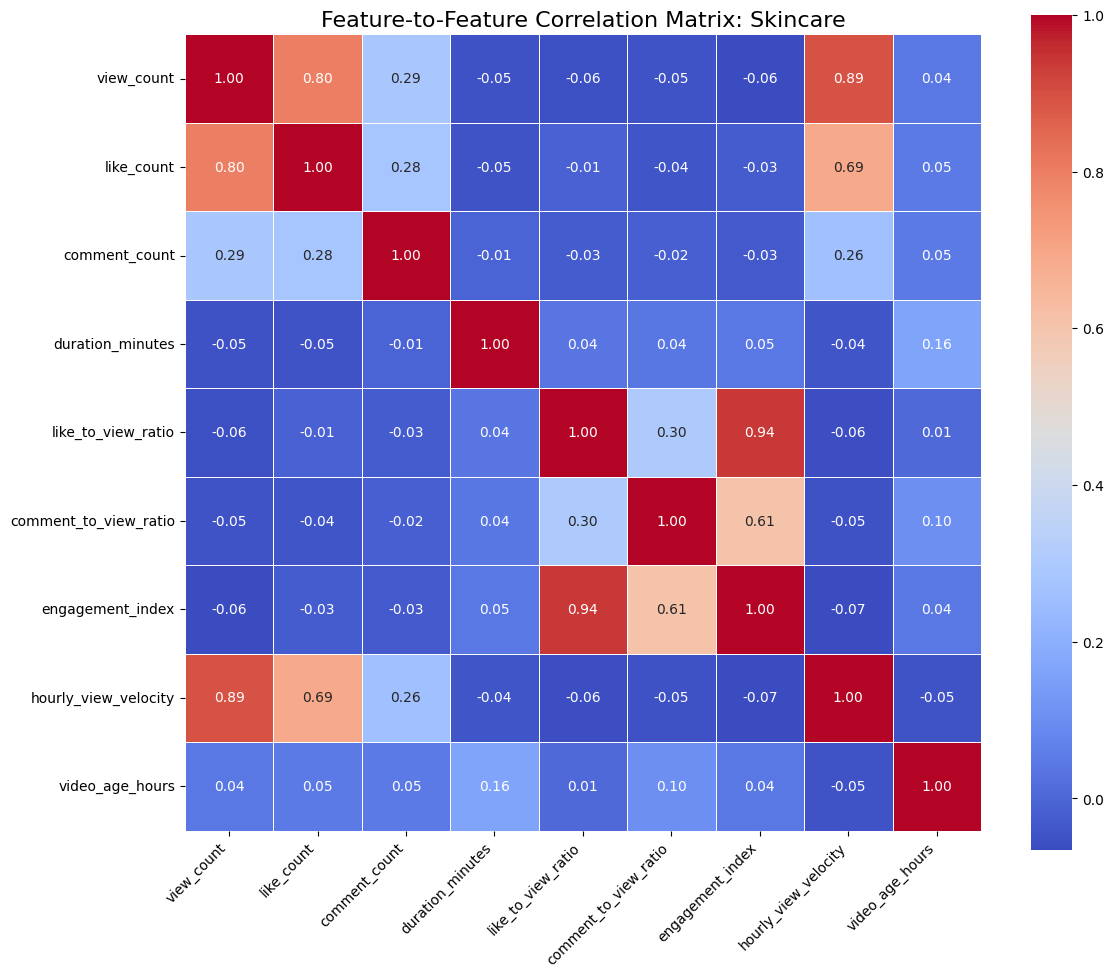

Three separate heatmaps displayed successfully.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_numeric_metrics = [
    'view_count', 'like_count', 'comment_count', 'duration_minutes',
     'like_to_view_ratio', 'comment_to_view_ratio',
    'engagement_index', 'hourly_view_velocity', 'video_age_hours'
]

# Filter columns present in the DataFrame
correlation_cols = [col for col in all_numeric_metrics if col in df_exploded_safe.columns]


# 2. Loop through each category to create and display a separate figure
for category in df_exploded_safe['category_list'].unique():

    # Filter the DataFrame for the current category
    category_df = df_exploded_safe[df_exploded_safe['category_list'] == category].copy()

    # Ensure enough data points exist for reliable correlation (N > 1)
    if len(category_df) <= 1:
        print(f"Skipping {category}: Not enough data points (N={len(category_df)}).")
        continue

    # Calculate the Full Correlation Matrix for the filtered data
    corr_matrix = category_df[correlation_cols].corr()

    # --- Start new figure for this category ---
    plt.figure(figsize=(12, 10))

    # Generate the Single Square Heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,             # Show the R-values
        cmap='coolwarm',        # Ideal for correlation analysis
        fmt=".2f",
        linewidths=0.5,
        linecolor='white',
        square=True             # Ensure the matrix cells are square
    )

    plt.title(f'Feature-to-Feature Correlation Matrix: {category}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Display the plot immediately
    plt.show()

print("Three separate heatmaps displayed successfully.")

In [18]:
import pandas as pd


columns_to_drop = [
    'view_count',
    'like_to_view_ratio'
    ,'comment_to_view_ratio','like_count' # Highly redundant with engagement_index (R=0.93)
]

try:
    # Safely drop columns that exist in the DataFrame
    df_exploded_safe = df_exploded_safe.drop(columns=[
        col for col in columns_to_drop if col in df_exploded_safe.columns
    ])
    print("Dropped redundant columns successfully.")

except NameError:
    # This handles the unlikely case where df_exploded_safe doesn't exist at all
    print("Error: DataFrame 'df_exploded_safe' not found. Please ensure it was defined.")

# Display the final, clean set of features for verification
print("\nFinal set of non-redundant columns for analysis:")
# Check which columns remain in the DataFrame
if 'df_exploded_safe' in locals():
    print(df_exploded_safe.columns.tolist())

Dropped redundant columns successfully.

Final set of non-redundant columns for analysis:
['video_id', 'query_used', 'title', 'channel_id', 'channel_title', 'audio_language', 'published_at', 'comment_count', 'duration', 'duration_seconds', 'duration_minutes', 'description', 'tags', 'video_url', 'channel_country', 'engagement_index', 'video_age_hours', 'hourly_view_velocity', 'category', 'category_list']


**Step 2.1: Overall Correlation Analysis**

Generate correlation heatmap for all videos to identify relationships between engagement metrics.

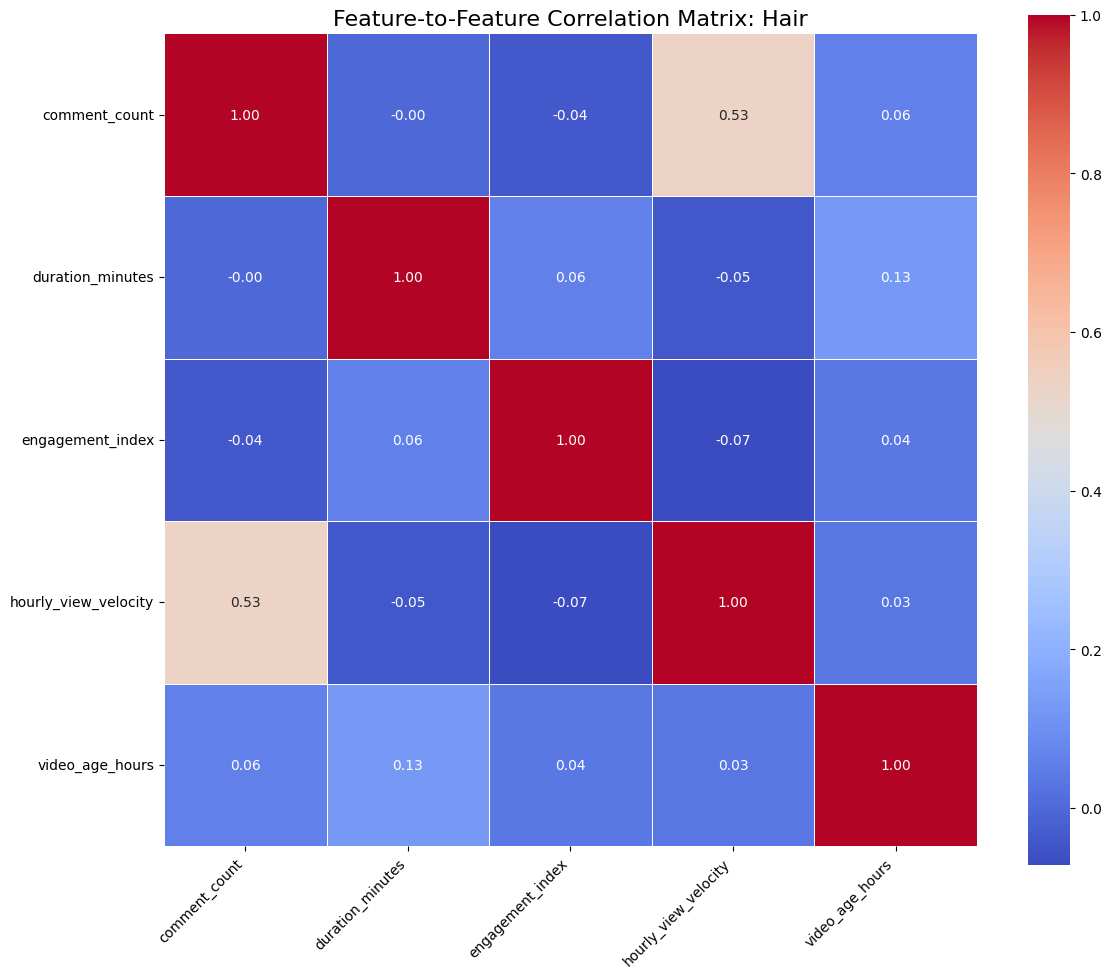

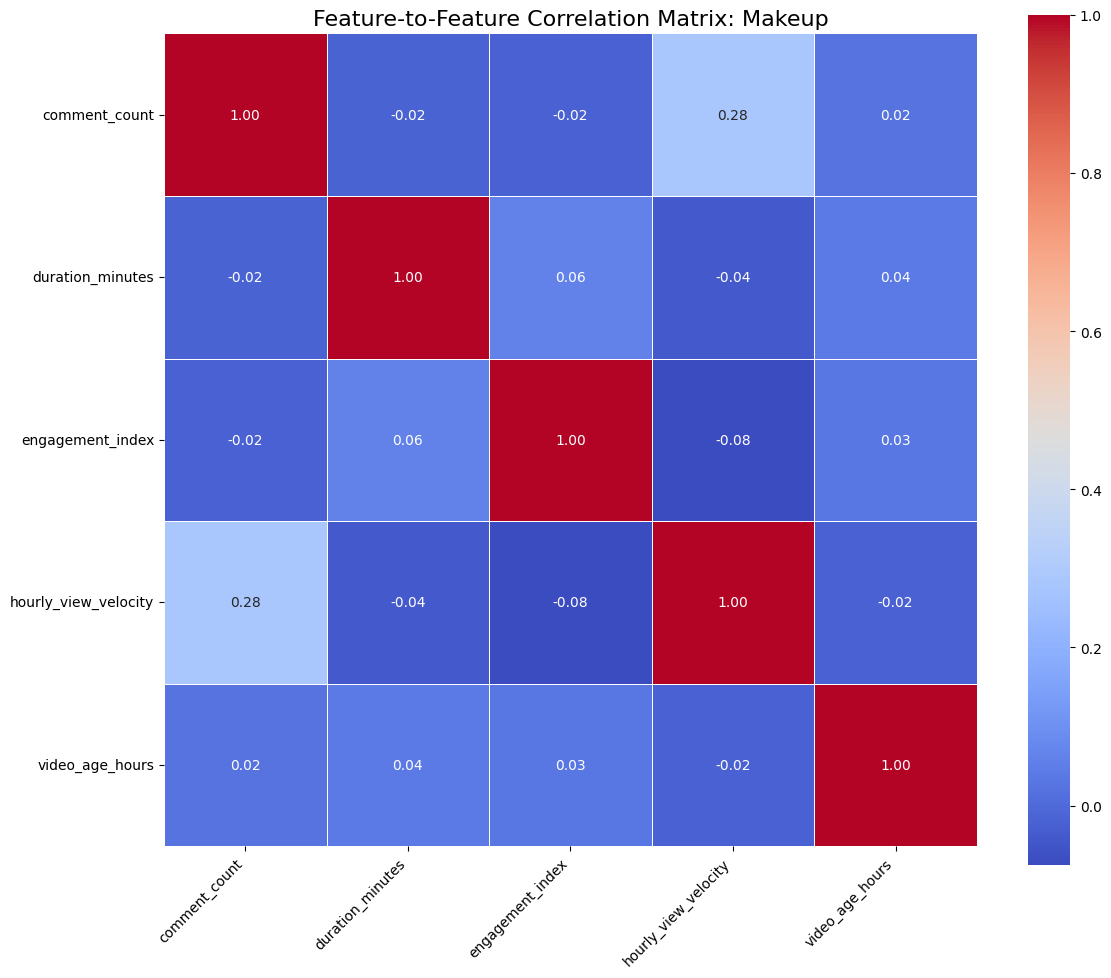

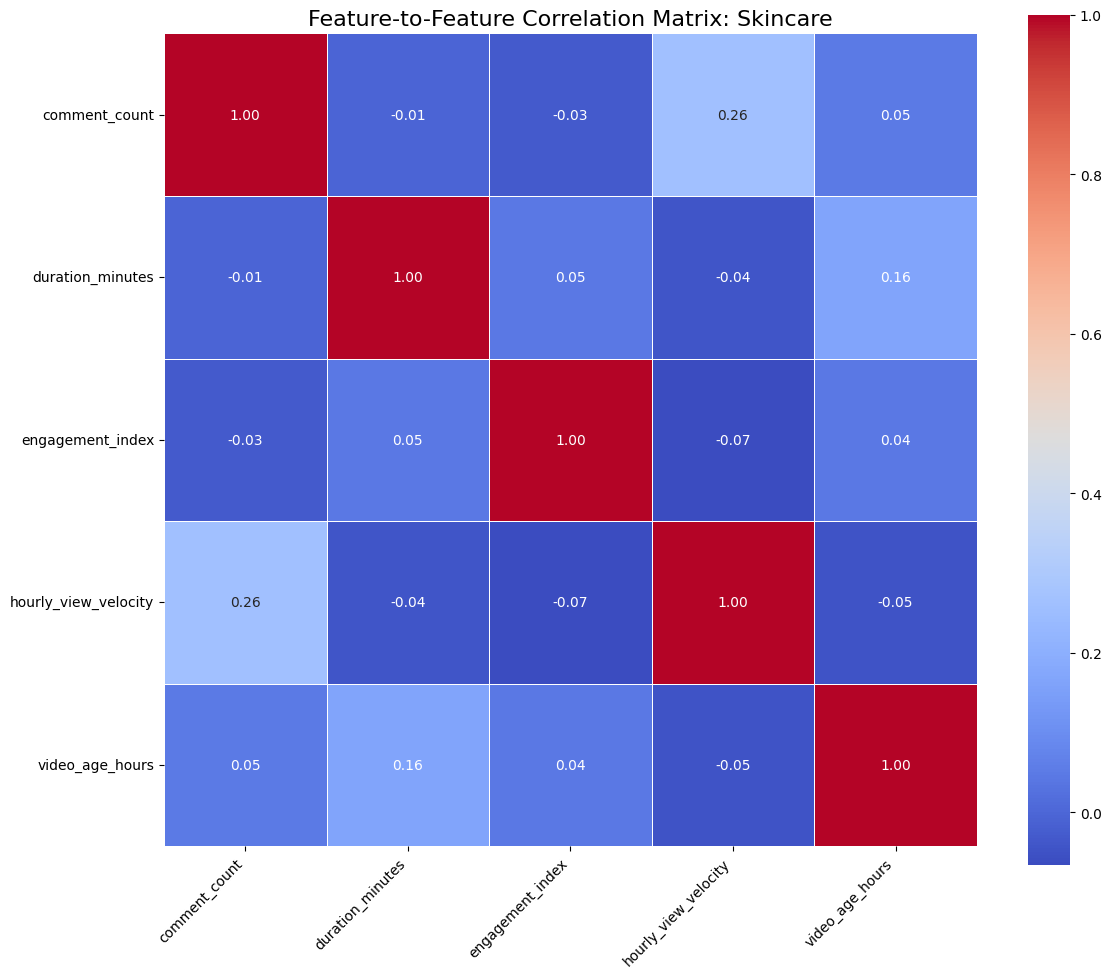

Three separate heatmaps displayed successfully.


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_numeric_metrics = [
    'view_count', 'like_count', 'comment_count', 'duration_minutes',
     'like_to_view_ratio', 'comment_to_view_ratio',
    'engagement_index', 'hourly_view_velocity', 'video_age_hours'
]

# Filter columns present in the DataFrame
correlation_cols = [col for col in all_numeric_metrics if col in df_exploded_safe.columns]

# 2. Loop through each category to create and display a separate figure
for category in df_exploded_safe['category_list'].unique():

    # Filter the DataFrame for the current category
    category_df = df_exploded_safe[df_exploded_safe['category_list'] == category].copy()

    # Ensure enough data points exist for reliable correlation (N > 1)
    if len(category_df) <= 1:
        print(f"Skipping {category}: Not enough data points (N={len(category_df)}).")
        continue

    # Calculate the Full Correlation Matrix for the filtered data
    corr_matrix = category_df[correlation_cols].corr()

    # --- Start new figure for this category ---
    plt.figure(figsize=(12, 10))

    # Generate the Single Square Heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,             # Show the R-values
        cmap='coolwarm',        # Ideal for correlation analysis
        fmt=".2f",
        linewidths=0.5,
        linecolor='white',
        square=True             # Ensure the matrix cells are square
    )

    plt.title(f'Feature-to-Feature Correlation Matrix: {category}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Display the plot immediately
    plt.show()

print("Three separate heatmaps displayed successfully.")

# 2. Correlation Analysis: Variable Selection and Methodology

For the correlation heatmaps, we focused on a subset of numeric behavioural metrics (view_count, like_count, comment_count, duration_minutes, engagement ratios, hourly_view_velocity, and video_age_hours).
We excluded:

Non-numeric or ID-like fields (title, URL, etc.), which do not have a meaningful linear correlation.

favorite_count, which is almost always zero and therefore adds no information.

duration_seconds, which is a rescaled duplicate of duration_minutes.

In [20]:
import pandas as pd
import numpy as np

# Define the boundaries (bins) for video length in minutes
# You can customize these boundaries based on your data distribution
bins = [0, 1.0, 5.0, 15.0, np.inf] # 0 to 1 min, 1 to 5 min, 5 to 15 min, 15+ min

# Define the corresponding labels for each bin
labels = ['<1 min (Shorts)', '1-5 min (Standard)', '5-15 min', '>15 min']

# Ensure duration_minutes is numeric and clean (fillna(0) for safety)
df_exploded_safe['duration_minutes'] = pd.to_numeric(df_exploded_safe['duration_minutes'], errors='coerce').fillna(0)

# Create the new categorical column using pd.cut()
df_exploded_safe['duration_bins'] = pd.cut(
    df_exploded_safe['duration_minutes'],
    bins=bins,
    labels=labels,
    right=False # Set to True if you want the bin to include the right edge (e.g., [1.0, 5.0])
)

# Display the frequency of the new bins for verification
print("Video Distribution by Duration:")
print(df_exploded_safe['duration_bins'].value_counts())

Video Distribution by Duration:
duration_bins
<1 min (Shorts)       3794
>15 min                671
5-15 min               575
1-5 min (Standard)     369
Name: count, dtype: int64


**Step 3.1: Calculate View Velocity Metric**

Compute hourly view velocity as the ratio of total views to video age in hours. This metric measures content momentum.

In [21]:

q50 = df_exploded_safe['hourly_view_velocity'].quantile(0.50)
q90 = df_exploded_safe['hourly_view_velocity'].quantile(0.90)

bins = [0, q50, q90, np.inf]

# Define the corresponding labels (3 labels for the 3 bins)
labels = ['Standard/Slow (Bottom 50%)', 'High Velocity (50%-90%)', 'Viral (Top 10%)']

# 2. Create the new categorical column using pd.cut()
df_exploded_safe['velocity_bins'] = pd.cut(
    df_exploded_safe['hourly_view_velocity'],
    bins=bins,
    labels=labels,
    include_lowest=True, # Include the lowest value (0)
    duplicates='drop'    # Add this to handle cases where q50 or q90 might equal 0 or another q value
)

# Display the frequency of the new bins for verification
print("\nVideo Distribution by Hourly Velocity:")
print(df_exploded_safe['velocity_bins'].value_counts())


Video Distribution by Hourly Velocity:
velocity_bins
Standard/Slow (Bottom 50%)    2705
High Velocity (50%-90%)       2163
Viral (Top 10%)                541
Name: count, dtype: int64


**Step 1.12: Tag Expansion**

Explode comma-separated tags into individual rows to enable tag-level analysis while preserving video-level metrics.

In [22]:
df_exploded_safe.head(10)

,video_id,query_used,title,channel_id,channel_title,audio_language,published_at,comment_count,duration,duration_seconds,...,tags,video_url,channel_country,engagement_index,video_age_hours,hourly_view_velocity,category,category_list,duration_bins,velocity_bins
0,IU8itp78taU,luxury makeup,Colorpop Holiday Set #shorts #fyp #shortvideo...,UCVRqF4H7agcJ3c5l949vZ7Q,Tarannum A Khan,en,2024-11-11 15:14:27+00:00,0,PT16S,16.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.044162,9168.588024,0.145715,Hair,Hair,<1 min (Shorts),Standard/Slow (Bottom 50%)
1,tnkmqUVBqfI,luxury makeup,Bought my wishlist product after a long wait N...,UCCa_wgdD931fdQJxrnhxWDA,Be Sassy,en-IN,2024-11-14 12:42:44+00:00,19,PT41S,41.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.046311,9099.116635,0.140014,Makeup,Makeup,<1 min (Shorts),Standard/Slow (Bottom 50%)
2,wLo5tks8g80,luxury makeup,No foundation Beginner Luxury Makeup for dark ...,UCetkBNSYkq2lrN2LhiZpgXg,Just Call Me Olu,en-US,2024-11-11 13:00:15+00:00,7,PT9M50S,590.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.068182,9170.824691,0.038383,"Hair, Makeup",Hair,5-15 min,Standard/Slow (Bottom 50%)
2,wLo5tks8g80,luxury makeup,No foundation Beginner Luxury Makeup for dark ...,UCetkBNSYkq2lrN2LhiZpgXg,Just Call Me Olu,en-US,2024-11-11 13:00:15+00:00,7,PT9M50S,590.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.068182,9170.824691,0.038383,"Hair, Makeup",Makeup,5-15 min,Standard/Slow (Bottom 50%)
3,27qV-8RXwWo,luxury makeup,Perfect red lipstick for holidays! #redlipstic...,UCXJZ7K1JalR81q0KUd3v2Eg,INNER GLOW,en,2024-11-12 19:42:04+00:00,0,PT15S,15.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.018923,9140.127746,0.075163,Makeup,Makeup,<1 min (Shorts),Standard/Slow (Bottom 50%)
4,aImfIUtMPak,luxury makeup,Luxury makeup dupe alert 🚨,UC5KFgxy8tWC7LDIZv3yriEg,Maria - No Spring Chicken,en-GB,2024-11-14 15:05:15+00:00,0,PT57S,57.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.039256,9096.741357,0.053206,Makeup,Makeup,<1 min (Shorts),Standard/Slow (Bottom 50%)
5,uuugY3oyfcU,luxury makeup,"""Exclusive Makeup Sale! Luxury, Long-Lasting M...",UCGTOZHn8qYhURD-j9-5SrJQ,La Beauté D’Alia,en,2024-11-14 17:17:42+00:00,0,PT16S,16.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.000000,9094.533857,0.005498,Makeup,Makeup,<1 min (Shorts),Standard/Slow (Bottom 50%)
6,lwlGWaj4eyw,luxury makeup,Sephora gives makeup for FREE 😱#beautyhacks,UCnuM_Ne3qc60Bs0a3faNb8g,KIKKKAPRO,en,2024-11-11 05:12:21+00:00,630,PT13S,13.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.040129,9178.623024,460.855184,Makeup,Makeup,<1 min (Shorts),Viral (Top 10%)
7,a1I2Fs4F5lM,luxury makeup,Kay beauty vs Swiss beauty ✅ which one afforda...,UCsBrpHOT5pt8tlZpeZ1DROQ,Divya & beauty,en,2024-11-14 04:21:49+00:00,139,PT46S,46.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.009869,9107.465246,61.227135,Makeup,Makeup,<1 min (Shorts),High Velocity (50%-90%)
8,AdTAlbFNJLc,luxury makeup,Experience luxury makeup right at home with Do...,UCcHxGPEGIYXJaBD_BzDHXbA,Y V O N,en,2024-11-13 19:45:59+00:00,0,PT56S,56.0,...,UNKNOWN,UNKNOWN,UNKNOWN,0.018966,9116.062469,0.063624,"Hair, Makeup",Hair,<1 min (Shorts),Standard/Slow (Bottom 50%)


In [23]:
import pandas as pd

# --- Analysis 1: Ranking Trends by Content Speed (Velocity Bins) ---

# Group by the Velocity Bins to find which speed performs best
velocity_trends = df_exploded_safe.groupby('velocity_bins').agg(
    Total_Videos=('video_id', 'nunique'),
    Avg_Engagement=('engagement_index', 'mean')
).reset_index()

# Sort to see which speed of content drives the highest engagement
velocity_trends_ranked = velocity_trends.sort_values(
    by='Avg_Engagement',
    ascending=False
)

print("\n--- 1. TREND: Performance by Content Velocity ---")
print("Which video speed drives the best engagement?")
print(velocity_trends_ranked)

# -------------------------------------------------------------------

# --- Analysis 2: Ranking Trends by Content Length (Duration Bins) ---

# Group by the Duration Bins to find which length performs best
duration_trends = df_exploded_safe.groupby('duration_bins').agg(
    Total_Videos=('video_id', 'nunique'),
    Avg_Engagement=('engagement_index', 'mean')
).reset_index()

# Sort to see which video length drives the highest engagement
duration_trends_ranked = duration_trends.sort_values(
    by='Avg_Engagement',
    ascending=False
)

print("\n--- 2. TREND: Performance by Video Length ---")
print("Which video length drives the best engagement?")
print(duration_trends_ranked)


--- 1. TREND: Performance by Content Velocity ---
Which video speed drives the best engagement?
                velocity_bins  Total_Videos  Avg_Engagement
0  Standard/Slow (Bottom 50%)          1885        0.061068
1     High Velocity (50%-90%)          1447        0.037000
2             Viral (Top 10%)           382        0.024016

--- 2. TREND: Performance by Video Length ---
Which video length drives the best engagement?
        duration_bins  Total_Videos  Avg_Engagement
3             >15 min           510        0.071235
2            5-15 min           419        0.066495
1  1-5 min (Standard)           268        0.049897
0     <1 min (Shorts)          2517        0.040529


/tmp/ipython-input-3952925793.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  velocity_trends = df_exploded_safe.groupby('velocity_bins').agg(
/tmp/ipython-input-3952925793.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_trends = df_exploded_safe.groupby('duration_bins').agg(


In [24]:
import pandas as pd

# --- Analysis 1: Performance by Content Speed (Velocity Bins) for EACH Category ---

print("--- 1. TREND: Average Engagement by VELOCITY BIN (Per Category) ---")

# Group FIRST by the actual Category, and THEN by the Velocity Bin
velocity_trends_by_category = df_exploded_safe.groupby(
    ['category_list', 'velocity_bins']
).agg(
    Total_Videos=('video_id', 'nunique'),
    Avg_Engagement=('engagement_index', 'mean')
).reset_index()

# Sort to see which velocity bin performs best within *each* category
velocity_trends_ranked = velocity_trends_by_category.sort_values(
    by=['category_list', 'Avg_Engagement'],
    ascending=[True, False]
)

print(velocity_trends_ranked)



print("\n--- 2. TREND: Average Engagement by DURATION BIN (Per Category) ---")

# Group FIRST by the actual Category, and THEN by the Duration Bin
duration_trends_by_category = df_exploded_safe.groupby(
    ['category_list', 'duration_bins']
).agg(
    Total_Videos=('video_id', 'nunique'),
    Avg_Engagement=('engagement_index', 'mean')
).reset_index()

# Sort to see which duration bin performs best within *each* category
duration_trends_ranked = duration_trends_by_category.sort_values(
    by=['category_list', 'Avg_Engagement'],
    ascending=[True, False]
)

print(duration_trends_ranked)

--- 1. TREND: Average Engagement by VELOCITY BIN (Per Category) ---
  category_list               velocity_bins  Total_Videos  Avg_Engagement
0          Hair  Standard/Slow (Bottom 50%)           473        0.063439
1          Hair     High Velocity (50%-90%)           414        0.040361
2          Hair             Viral (Top 10%)           107        0.024289
3        Makeup  Standard/Slow (Bottom 50%)          1859        0.060180
4        Makeup     High Velocity (50%-90%)          1399        0.035798
5        Makeup             Viral (Top 10%)           354        0.023520
6      Skincare  Standard/Slow (Bottom 50%)           373        0.062488
7      Skincare     High Velocity (50%-90%)           350        0.037830
8      Skincare             Viral (Top 10%)            80        0.025846

--- 2. TREND: Average Engagement by DURATION BIN (Per Category) ---
   category_list       duration_bins  Total_Videos  Avg_Engagement
2           Hair            5-15 min            96      

/tmp/ipython-input-3726037764.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  velocity_trends_by_category = df_exploded_safe.groupby(
/tmp/ipython-input-3726037764.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_trends_by_category = df_exploded_safe.groupby(


# 3. Defining Hourly View Velocity as a Trend Indicator

$$\text{Hourly View Velocity} = \frac{\text{Total Views}}{\text{Video Age in Hours}}$$ Significance in Trend AnalysisView speed is the direct measure of a video's immediacy and trending potential:High View Speed: Indicates a video is currently popular and rapidly accumulating views, often because it's being pushed by the algorithm or is part of a live trend (i.e., it's "going viral").Low View Speed: Indicates a video is gaining views slowly, often because it's evergreen content discovered through search or older links.

/tmp/ipython-input-2325373193.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')


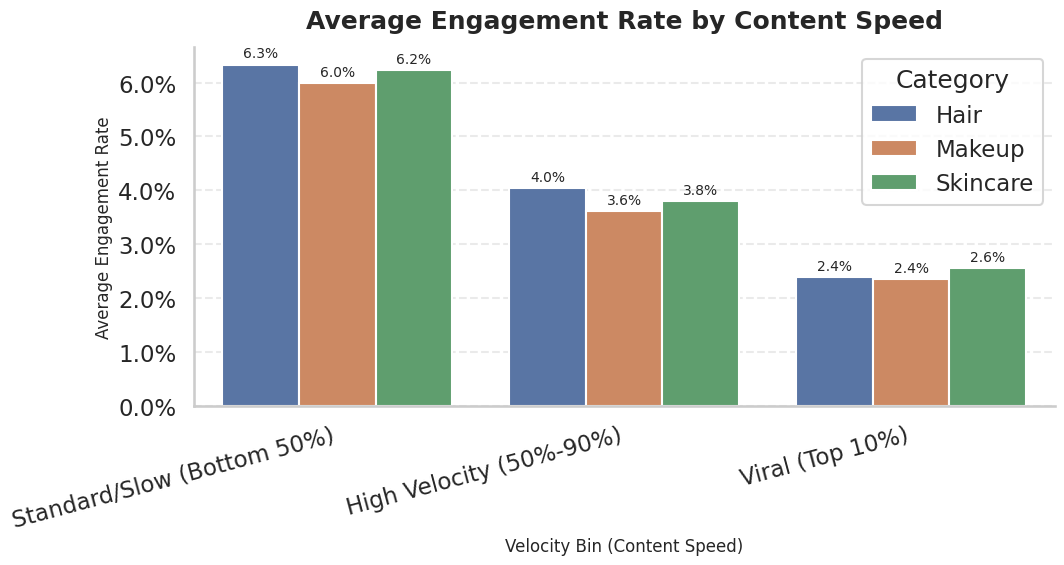

/tmp/ipython-input-2325373193.py:141: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')


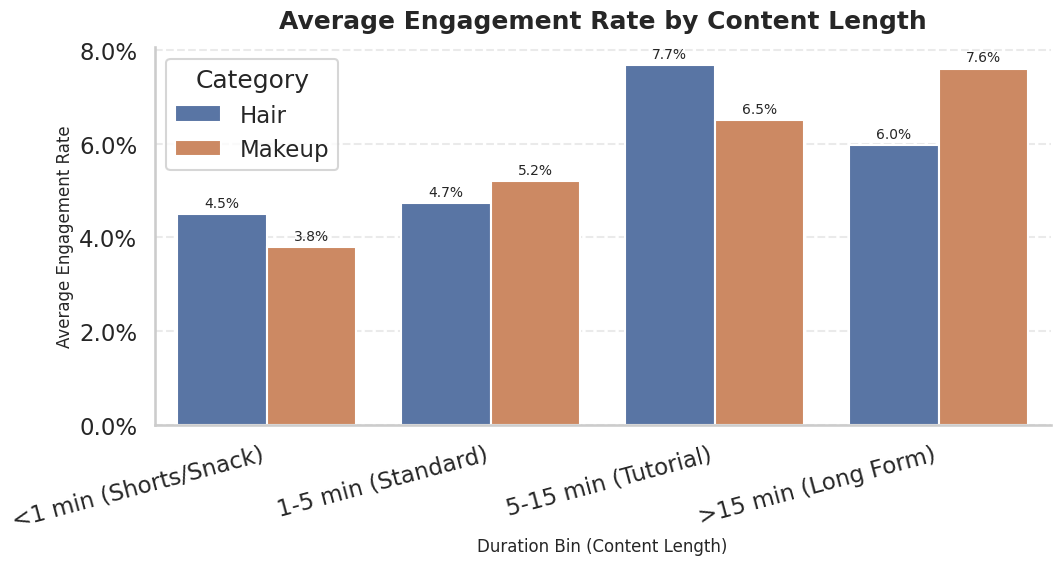

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# -------------------------------------------------
# DATA
# -------------------------------------------------

# 1) Velocity trends (Hair, Makeup, Skincare)
velocity_data = {
    'category_list': [
        'Hair', 'Hair', 'Hair',
        'Makeup', 'Makeup', 'Makeup',
        'Skincare', 'Skincare', 'Skincare'
    ],
    'velocity_bins': [
        'Standard/Slow (Bottom 50%)', 'High Velocity (50%-90%)', 'Viral (Top 10%)',
        'Standard/Slow (Bottom 50%)', 'High Velocity (50%-90%)', 'Viral (Top 10%)',
        'Standard/Slow (Bottom 50%)', 'High Velocity (50%-90%)', 'Viral (Top 10%)'
    ],
    'Total_Videos': [474, 416, 104, 1858, 1402, 354, 375, 347, 81],
    'Avg_Engagement': [
        0.063344, 0.040395, 0.023899,
        0.059958, 0.036089, 0.023550,
        0.062338, 0.037956, 0.025541
    ]
}
df_velocity = pd.DataFrame(velocity_data)

# 2) Duration trends (currently Hair + Makeup only)
duration_data = {
    'category_list': [
        'Hair', 'Hair', 'Hair', 'Hair',
        'Makeup', 'Makeup', 'Makeup', 'Makeup'
    ],
    'duration_bins': [
        '5-15 min (Tutorial)', '>15 min (Long Form)', '1-5 min (Standard)', '<1 min (Shorts/Snack)',
        '>15 min (Long Form)', '5-15 min (Tutorial)', '1-5 min (Standard)', '<1 min (Shorts/Snack)'
    ],
    'Total_Videos': [96, 96, 60, 742, 493, 407, 256, 2458],
    'Avg_Engagement': [
        0.076680, 0.059654, 0.047311, 0.044998,
        0.075987, 0.064965, 0.051944, 0.037890
    ]
}
df_duration = pd.DataFrame(duration_data)

# If you later have Skincare duration stats, just append 4 more rows to duration_data.

# -------------------------------------------------
# GLOBAL STYLE
# -------------------------------------------------
sns.set_theme(style="whitegrid", context="talk")

# Helper to add % labels on top of bars (correctly scaled)
def add_percent_labels(ax):
    for container in ax.containers:
        heights = [p.get_height() for p in container]
        labels = [f"{h * 100:.1f}%" for h in heights]
        ax.bar_label(container, labels=labels, padding=3, fontsize=10)


# -------------------------------------------------
# PLOT 1: VELOCITY TRENDS
# -------------------------------------------------
velocity_order = [
    'Standard/Slow (Bottom 50%)',
    'High Velocity (50%-90%)',
    'Viral (Top 10%)'
]

fig, ax = plt.subplots(figsize=(11, 6))

sns.barplot(
    data=df_velocity,
    x='velocity_bins',
    y='Avg_Engagement',
    hue='category_list',
    order=velocity_order,
    ax=ax
)

ax.set_title(
    'Average Engagement Rate by Content Speed',
    fontsize=18,
    pad=14,
    fontweight='bold'
)
ax.set_xlabel('Velocity Bin (Content Speed)', fontsize=12)
ax.set_ylabel('Average Engagement Rate', fontsize=12)

# y-axis as percent
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

# Add % labels on top
add_percent_labels(ax)

ax.legend(title='Category', frameon=True)
ax.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()


# -------------------------------------------------
# PLOT 2: DURATION TRENDS
# -------------------------------------------------
duration_order = [
    '<1 min (Shorts/Snack)',
    '1-5 min (Standard)',
    '5-15 min (Tutorial)',
    '>15 min (Long Form)'
]

fig, ax = plt.subplots(figsize=(11, 6))

sns.barplot(
    data=df_duration,
    x='duration_bins',
    y='Avg_Engagement',
    hue='category_list',
    order=duration_order,
    ax=ax
)

ax.set_title(
    'Average Engagement Rate by Content Length',
    fontsize=18,
    pad=14,
    fontweight='bold'
)
ax.set_xlabel('Duration Bin (Content Length)', fontsize=12)
ax.set_ylabel('Average Engagement Rate', fontsize=12)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')

add_percent_labels(ax)

ax.legend(title='Category', frameon=True)
ax.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()



# 4. Key Trends: Velocity vs. Engagement and Duration Impact Analysis

## Trend 1: Content Speed (Velocity) Analysis

The data shows a decisive, counter-intuitive trend across all categories: **slower content drives higher engagement**. This confirms that the quality of the audience acquisition is more important than the speed of view accumulation.

| Category | Highest Eng. Rate | Lowest Eng. Rate |
| :--- | :--- | :--- |
| **Hair** | **Standard/Slow (0.0633)** | Viral (0.0238) |
| **Makeup** | **Standard/Slow (0.0599)** | Viral (0.0235) |
| **Skincare** | **Standard/Slow (0.0623)** | Viral (0.0255) |

**Meaning:** The **Standard/Slow (Bottom 50%)** bin, representing content discovered by highly motivated viewers through search or niche evergreen topics, consistently yields the best performance. This audience is committed and converts views into interaction. Conversely, the **Viral (Top 10%)** bin, which captures non-committal, casual viewers from sudden algorithmic pushes, yields the lowest engagement rate. The strategy here is clear: **prioritize content that attracts a niche, loyal audience over chasing viral spikes.**

***

## Trend 2: Content Length (Duration) Analysis

The duration analysis confirms that for beauty and instructional content, **viewer commitment increases with video length**, leading to superior results. The engagement rate generally scales up directly with the time required to watch the content.

### 1. The Value of Long Form (Highest Engagement)

The top two bins for both Hair and Makeup are the longest formats, indicating that viewers are highly invested in these subjects:

* **Makeup:** The **Long Form (>15 min)** content drives the highest engagement ($\mathbf{0.0759}$), followed closely by the **Tutorial (5-15 min)** content ($\mathbf{0.0649}$). This suggests that deep-dive masterclasses, full routines, and elaborate reviews are the highest-quality content formats.
* **Hair:** The **Tutorial (5-15 min)** content is the clear leader ($\mathbf{0.0766}$), with Long Form content also performing well ($\mathbf{0.0596}$). This confirms that audiences seek detailed, practical guidance for hair techniques.

### 2. The Low-Value of Brevity (Lowest Engagement)

The **<1 min (Shorts/Snack)** bin consistently generates the lowest engagement for both primary categories:

* For Makeup, the **Shorts/Snack** format is the least engaging ($\mathbf{0.0378}$), confirming that these quick-hit videos do not successfully translate views into meaningful loyalty or interaction.
* The data underscores that while short videos drive volume (the Makeup Shorts bin has $\mathbf{2458}$ total videos), they are the least effective way to build a highly engaged community.

**Strategic Conclusion:** To maximize audience engagement (likes and comments), the strategic focus for content creation should be on **Long Form (>15 min) and Tutorial (5-15 min)** content formats across the board.

**Step 3.1: Calculate View Velocity Metric**

Compute hourly view velocity as the ratio of total views to video age in hours. This metric measures content momentum.

In [26]:
import numpy as np
import pandas as pd

# Make sure these columns exist and are numeric
df_exploded_safe = df_exploded_safe.copy()

# Remove infinities if any (just in case)
df_exploded_safe = df_exploded_safe.replace([np.inf, -np.inf], np.nan)

# Drop rows where we cannot compute velocity or engagement
df_exploded_safe = df_exploded_safe.dropna(subset=['hourly_view_velocity', 'engagement_index'])

# Define quantile cutpoints and labels
quantiles = [0.0, 0.5, 0.9, 1.0]
velocity_labels = [
    'Standard/Slow (Bottom 50%)',
    'High Velocity (50%-90%)',
    'Viral (Top 10%)'
]

# Create per-video velocity bin
df_exploded_safe['velocity_bin'] = pd.qcut(
    df_exploded_safe['hourly_view_velocity'],
    q=quantiles,
    labels=velocity_labels,
    duplicates='drop'   # avoids errors if some quantiles collapse
)



**Step 4.1: Velocity Impact Analysis**

Calculate engagement rates (likes + comments / views) for each velocity bin by content category.

In [27]:
velocity_stats = (
    df_exploded_safe
    .groupby(['category_list', 'velocity_bin'])
    .agg(
        Avg_Engagement=('engagement_index', 'mean'),
        Std_Engagement=('engagement_index', 'std'),
        N=('engagement_index', 'size')
    )
    .reset_index()
)

velocity_stats['SE_Engagement'] = velocity_stats['Std_Engagement'] / np.sqrt(velocity_stats['N'])
velocity_stats


/tmp/ipython-input-765749459.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['category_list', 'velocity_bin'])


,category_list,velocity_bin,Avg_Engagement,Std_Engagement,N,SE_Engagement
0,Hair,Standard/Slow (Bottom 50%),0.063439,0.096213,473,0.004424
1,Hair,High Velocity (50%-90%),0.040361,0.032002,414,0.001573
2,Hair,Viral (Top 10%),0.024289,0.017292,107,0.001672
3,Makeup,Standard/Slow (Bottom 50%),0.060180,0.086901,1859,0.002016
4,Makeup,High Velocity (50%-90%),0.035798,0.032516,1399,0.000869
5,Makeup,Viral (Top 10%),0.023520,0.018774,354,0.000998
6,Skincare,Standard/Slow (Bottom 50%),0.062488,0.105100,373,0.005442
7,Skincare,High Velocity (50%-90%),0.037830,0.028399,350,0.001518
8,Skincare,Viral (Top 10%),0.025846,0.019834,80,0.002217


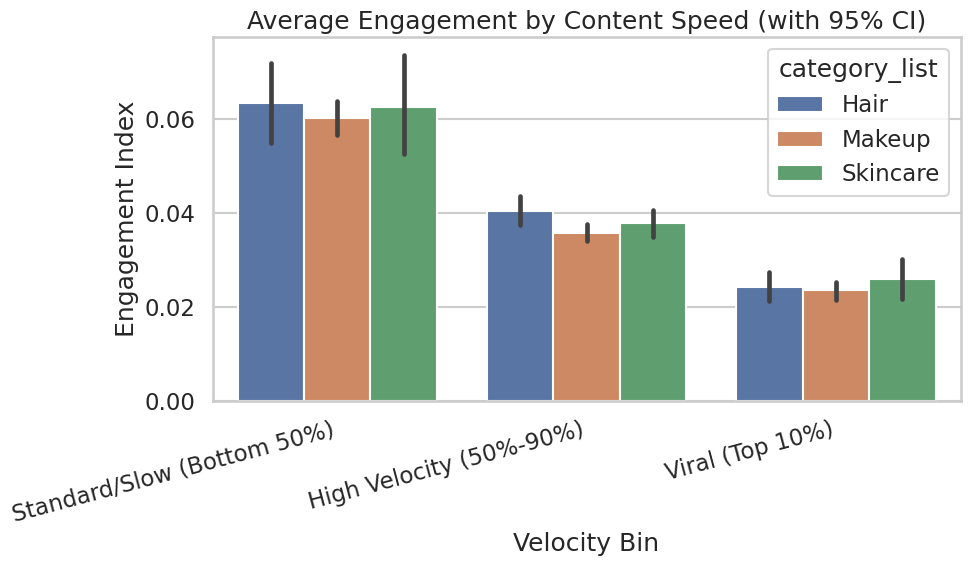

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x='velocity_bin',
    y='engagement_index',
    hue='category_list',
    data=df_exploded_safe,
    errorbar=('ci', 95)
)
plt.title('Average Engagement by Content Speed (with 95% CI)')
plt.xlabel('Velocity Bin')
plt.ylabel('Engagement Index')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3594572652.py:21: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax = sns.pointplot(
/tmp/ipython-input-3594572652.py:21: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(
/tmp/ipython-input-3594572652.py:21: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  ax = sns.pointplot(


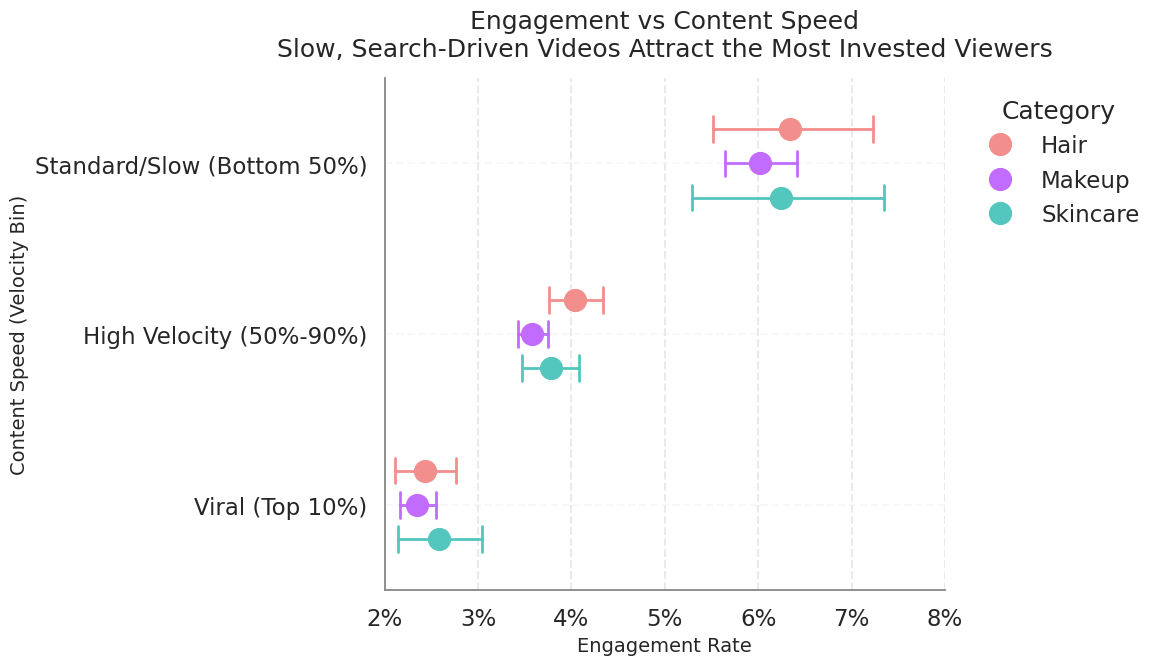

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="whitegrid", context="talk")

velocity_order = [
    'Standard/Slow (Bottom 50%)',
    'High Velocity (50%-90%)',
    'Viral (Top 10%)'
]

pretty_palette = {
    'Hair':     '#F28E8C',
    'Makeup':   '#C26BFF',
    'Skincare': '#53C6BE',
}

plt.figure(figsize=(12, 7))

ax = sns.pointplot(
    data=df_exploded_safe,
    y='velocity_bin',
    x='engagement_index',
    hue='category_list',
    order=velocity_order,
    dodge=0.4,
    join=False,
    errorbar=('ci', 95),
    markers='o',
    scale=1.5,
    errwidth=2,
    capsize=.15,
    palette=pretty_palette
)


ax.set_title(
    'Engagement vs Content Speed\nSlow, Search-Driven Videos Attract the Most Invested Viewers',
    fontsize=18,
    pad=16
)
ax.set_xlabel('Engagement Rate', fontsize=14)
ax.set_ylabel('Content Speed (Velocity Bin)', fontsize=14)


ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))
ax.set_xlim(0.02, 0.08)


ax.grid(axis='x', linestyle='--', color='#dddddd', alpha=0.6)
ax.grid(axis='y', linestyle='--', color='#eeeeee', alpha=0.4)


for spine in ['bottom', 'left']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('#888888')
    ax.spines[spine].set_linewidth(1.3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.legend(
    title='Category',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.tight_layout()
plt.show()


**Step 2.1: Overall Correlation Analysis**

Generate correlation heatmap for all videos to identify relationships between engagement metrics.

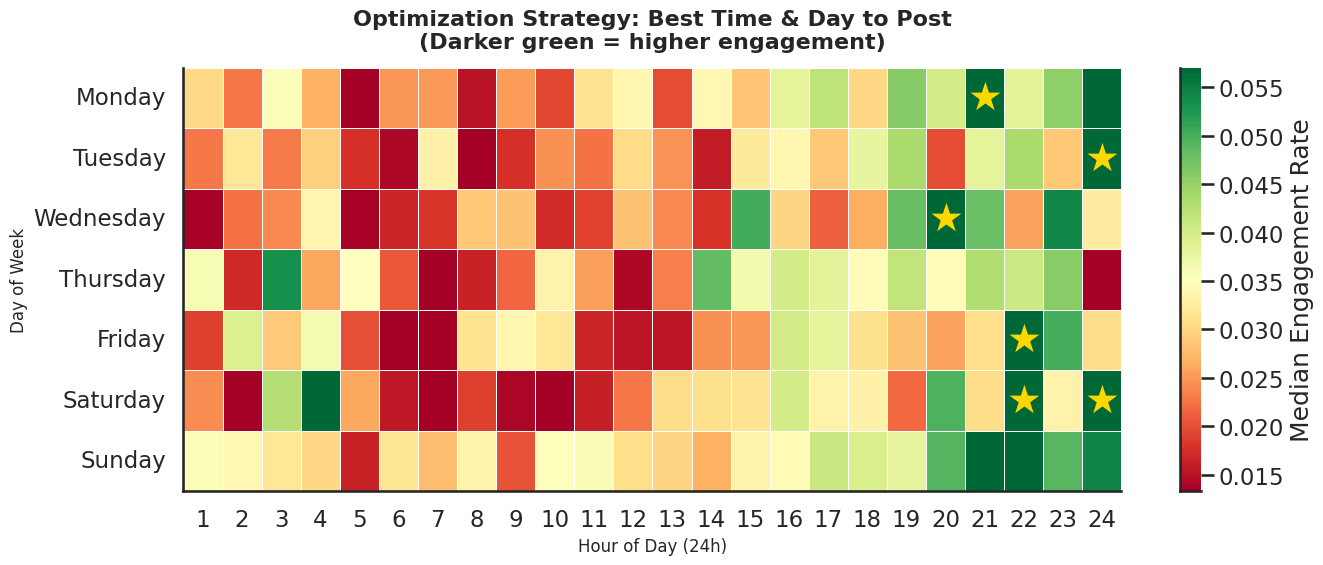

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", context="talk")

# ----------------------------------
# 1. Prepare time features from df_exploded_safe
# ----------------------------------
df_time = df_exploded_safe.copy()

df_time['published_at'] = pd.to_datetime(df_time['published_at'])
df_time['day_of_week'] = df_time['published_at'].dt.day_name()
df_time['hour_of_day'] = df_time['published_at'].dt.hour  # 0–23

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# ----------------------------------
# 2. Pivot: median engagement by day x hour
# ----------------------------------
time_pivot = (
    df_time
    .pivot_table(
        index='day_of_week',
        columns='hour_of_day',
        values='engagement_index',
        aggfunc='median'
    )
    .reindex(days_order)
)

# Reorder columns so 1–23 first, then 0 at the end (displayed as 24)
cols = [h for h in range(1, 24) if h in time_pivot.columns]
if 0 in time_pivot.columns:
    cols.append(0)

time_pivot_plot = time_pivot[cols]

# Tighten color range
vmin = np.nanpercentile(time_pivot_plot.values, 5)
vmax = np.nanpercentile(time_pivot_plot.values, 95)

# ----------------------------------
# 3. Plot heatmap
# ----------------------------------
plt.figure(figsize=(14, 6))

ax = sns.heatmap(
    time_pivot_plot,
    cmap='RdYlGn',                # red → yellow → green
    vmin=vmin,
    vmax=vmax,
    annot=False,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Median Engagement Rate'}
)

ax.set_title(
    'Optimization Strategy: Best Time & Day to Post\n(Darker green = higher engagement)',
    fontsize=16,
    pad=14,
    fontweight='bold'
)
ax.set_xlabel('Hour of Day (24h)', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)

# Show 0 as 24 on the far right
tick_labels = [24 if h == 0 else h for h in cols]
ax.set_xticklabels(tick_labels, rotation=0)

# ----------------------------------
# 4. Highlight top engagement cells with big yellow stars ★
# ----------------------------------
top_cells = (
    time_pivot_plot
    .stack()
    .sort_values(ascending=False)
    .head(6)   # top 6 time slots
)

for (day, hour), val in top_cells.items():
    y = days_order.index(day) + 0.5
    x = cols.index(hour) + 0.5
    ax.text(
        x, y, '★',          # filled star symbol
        ha='center',
        va='center',
        color='gold',
        fontsize=28,        # bigger
        fontweight='bold'
    )

sns.despine(left=False, bottom=False, right=True, top=True)
plt.tight_layout()
plt.show()



# 5. Temporal Analysis: Optimal Posting Times by Day and Hour

This heatmap shows median engagement by day of week and hour of day, built from all our videos. Darker green cells mean higher engagement, and the yellow stars mark the top-performing time slots.

Two clear patterns emerge. First, evenings win. Across most days, engagement ramps up after around 6–7pm and peaks in the late evening around 9pm–midnight, especially on Friday and Saturday, where we see multiple starred cells. This suggests that when viewers are done with work or school, they're most ready to watch and interact with beauty content.

Second, there are a few standout "surprise" windows. We see isolated high-engagement pockets mid-week, like Wednesday late afternoon and an early-morning spike on Thursday. These may represent niche but loyal segments—people who consistently watch at those times.

Translating this into an optimization strategy, our primary posting windows should be evenings on Friday, Saturday, Sunday, plus late-evening early-week slots like Monday 9–11pm and Tuesday around midnight. We can then A/B test additional posts in those "surprise" windows to see whether they're worth scaling.

**Step 6.1: High-Engagement Content Analysis**

Generate word cloud from titles of top 25% videos by engagement to identify language patterns associated with high performance.

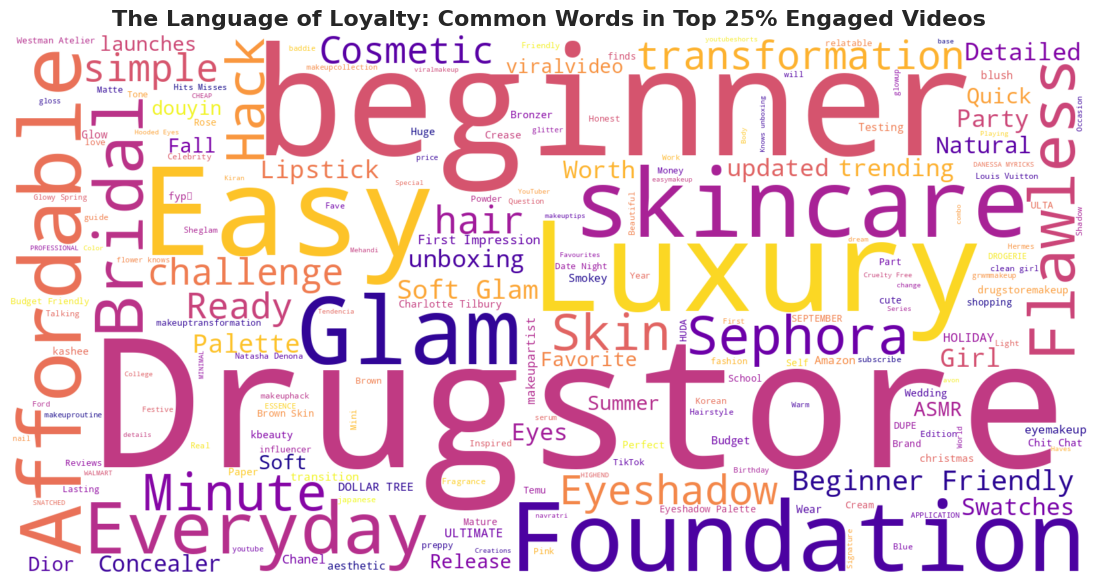

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# 1. Select high-engagement videos (top 25%)
source_df = df_exploded_safe.copy()

high_value_videos = source_df[
    source_df['engagement_index'] > source_df['engagement_index'].quantile(0.75)
]

# 2. Choose text column: title if available, otherwise query_used
text_col = 'title' if 'title' in source_df.columns else 'query_used'

# If there is literally no text, better to fail clearly
if high_value_videos[text_col].dropna().empty:
    raise ValueError("No text available in high-engagement videos to build a word cloud.")

text = " ".join(high_value_videos[text_col].astype(str))

# ---- AUTO-FILTER SETUP ----
all_titles = source_df[text_col].astype(str)

# Count all words across all titles
word_counts = Counter()
for title in all_titles:
    for word in title.lower().split():
        word_counts[word] += 1

# A: remove words appearing in >20% of all titles
threshold = 0.20
cutoff = len(all_titles) * threshold
auto_stopwords = {w for w, c in word_counts.items() if c > cutoff}

# B: remove words with length <= 3
length_stopwords = {w for w in word_counts if len(w) <= 3}

# Manual custom stopwords (optional)
extra_stopwords = {
    'vlog','daily','video','viral','2023','2024','best','s',
    'trend','product','look','looks','looking','products','steps',
    'step','tutorial','routine','using','haul','declutter',
    'short','shorts','long','full','face','grwm','GRWM','review','tips',
    'shop','test','tests','make','live','plus','time','must','nyakaa','maquillaje',
    'trying','need','high','makeup','MAKEUP','facetime','beauty','trends','makeuptutorial',
    'collection','nykaa','foryou'
}

# Combine all stopwords
stopwords = STOPWORDS.union(extra_stopwords, length_stopwords, auto_stopwords)

# ---- Generate word cloud ----
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='plasma',
    stopwords=stopwords
).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(
    'The Language of Loyalty: Common Words in Top 25% Engaged Videos',
    fontsize=16,
    fontweight='bold'
)
plt.show()


# 6. Content Strategy Insights: Language and Themes from Top-Performing Videos

This word cloud is built only from the top 25% of videos by engagement, so every word you see here comes from titles that actually performed well with viewers. The bigger the word, the more often it appears in those high-engagement titles – that's why terms like beginner, easy, drugstore, luxury, skincare, and foundation dominate the visual.

First, beginner-friendly content really dominates. Words such as beginner, easy, simple, everyday show that audiences are actively searching for content that feels doable – they want step-by-step, low-intimidation tutorials rather than advanced, expert-only looks. This suggests our creators should frame videos as "for beginners" or "easy routines" if they want to maximize reach.

Second, price sensitivity is very strong. The prominence of drugstore, affordable, budget indicates that cost-friendly products are a major engagement driver. Even when viewers are watching beauty content for fun, they still care whether they can realistically buy and recreate the look.

Third, we see a dual interest in luxury and practicality. Terms like luxury and Sephora appear right next to drugstore and affordable, which tells us the audience is split but highly engaged with both ends of the price spectrum. They enjoy aspirational luxury content, but they also want realistic drugstore options – so a good strategy is to pair "save vs splurge" or "drugstore dupes for luxury looks."

Finally, skill-based themes really resonate. Words such as foundation, eyeshadow, bridal, glam, transformation point to strong demand for technique-focused tutorials: how to build a base, how to do glam or bridal looks, and how to achieve a visible "before/after" transformation. Taken together, this "language of loyalty" guides our content ideation, keyword strategy, and product selection – telling creators exactly how to title and position their videos to tap into what the high-engagement audience already responds to.